In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter
import thinkbayes2
from thinkbayes2 import Pmf, Cdf, Suite
import thinkplot
% matplotlib inline

Find Distribution of Drawing Odds

In [2]:
df_list = []
for file in os.listdir("data/"):
    if file[0] == "E":
        df_list.append(pd.read_csv("data/" + file))
odds_df = pd.concat(df_list)

ValueError: No objects to concatenate

In [ ]:
odds_df.BbMxD.hist(bins=32)
plt.show()

In [4]:
odds_df.BbMxD.describe()

count    2660.000000
mean        4.316827
std         1.412220
min         3.100000
25%         3.477500
50%         3.750000
75%         4.550000
max        14.000000
Name: BbMxD, dtype: float64

In [5]:
big_teams = ["Arsenal", "Chelsea", "Man United", "Man City", "Liverpool", "Tottenham"]

Only pick teams where a big team isn't at home except in the case of big teams playing each other

In [6]:
odds_df_big_team_rule = odds_df[(~odds_df.HomeTeam.isin(big_teams)) | 
                                ((odds_df.HomeTeam.isin(big_teams)) & (odds_df.AwayTeam.isin(big_teams)))]

In [7]:
odds_df_big_team_rule[~odds_df_big_team_rule.AwayTeam.isin(big_teams)].HomeTeam.unique()

array(['Crystal Palace', 'Everton', 'Southampton', 'West Brom',
       'Bournemouth', 'Burnley', 'Leicester', 'Huddersfield', 'Newcastle',
       'Watford', 'Brighton', 'Swansea', 'West Ham', 'Stoke', 'Blackburn',
       'Fulham', 'QPR', 'Wigan', 'Aston Villa', 'Sunderland', 'Norwich',
       'Wolves', 'Bolton', 'Hull', 'Cardiff', nan, 'Middlesbrough'], dtype=object)

Appears to have worked!

In [8]:
odds_df[odds_df.HomeTeam.isnull()]

,AC,AF,AR,AS,AST,AY,AwayTeam,B365A,B365D,B365H,...,SBH,SJA,SJD,SJH,VCA,VCD,VCH,WHA,WHD,WHH
380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
odds_df_big_team_rule.dropna(subset=["HomeTeam"], inplace=True)

/Users/alexandergreen/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


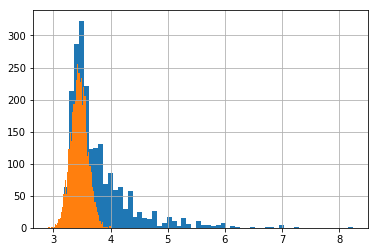

In [17]:
odds_df_big_team_rule.BbMxD.hist(bins=60)
pd.Series(np.random.normal(3.45, 0.15, 4000)).hist(bins=50)
plt.show()

In [99]:
pd.Series(np.random.normal(3.45, 0.15, 6000)).min()

2.9258055851485887

In [80]:
odds_df_big_team_rule.BbMxD.describe()

count    2072.000000
mean        3.778287
std         0.576202
min         3.100000
25%         3.410000
50%         3.600000
75%         3.950000
max         8.240000
Name: BbMxD, dtype: float64

Mean of 3.45 and sd of 0.15 seems to describe our distribution quite well

Out of interest, let's look at when the odds are higher than 4 for a draw

In [132]:
Counter(odds_df_big_team_rule[odds_df_big_team_rule.BbMxD > 4][["AwayTeam"]].transpose().values[0])

Counter({'Arsenal': 54,
         'Aston Villa': 4,
         'Blackburn': 1,
         'Bolton': 2,
         'Bournemouth': 4,
         'Burnley': 7,
         'Cardiff': 2,
         'Chelsea': 64,
         'Crystal Palace': 6,
         'Everton': 2,
         'Fulham': 2,
         'Huddersfield': 4,
         'Hull': 6,
         'Leicester': 2,
         'Liverpool': 47,
         'Man City': 85,
         'Man United': 46,
         'Middlesbrough': 1,
         'Newcastle': 6,
         'Norwich': 4,
         'QPR': 4,
         'Southampton': 1,
         'Stoke': 4,
         'Sunderland': 14,
         'Swansea': 4,
         'Tottenham': 37,
         'Watford': 5,
         'West Brom': 4,
         'West Ham': 4,
         'Wigan': 2,
         'Wolves': 6})

Appears to be inordinately the big teams away from home, so most likely our distirbution is better of cutting off this skewed tail 

Calculate distribution of winnings, winnings vs stakes and bankroll after one season for consensus

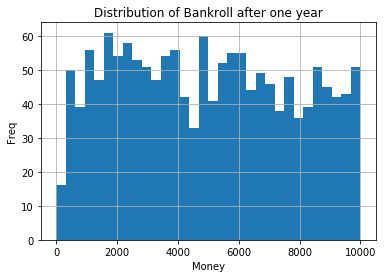

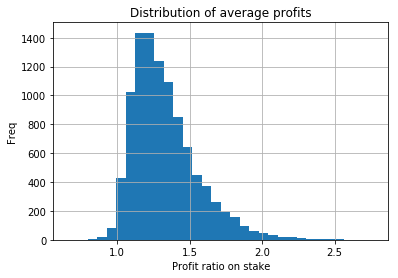

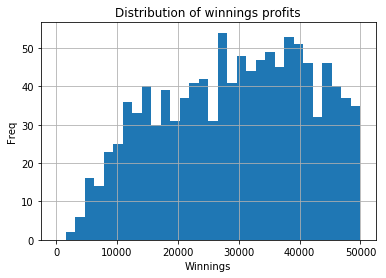

In [10]:
starting_money = 1000
drawing_chance = 0.416
both_predict_draw_chance = 0.089
length_of_season = 38 * 4
matches_in_round = 10
winning_odds_mean = 3.55 * 0.99
winning_odds_sdev = 0.14
percent_of_money_to_spend = 0.1
season_end_money = []
percentages = []
winnings = []
roi = []

def sim_one_season():
    
    for sim in range(0, 10000):
        money = starting_money
        match_week = 0
        overall_stake_in_season = 0
        overall_winnings_in_season = 0
        
        while match_week < length_of_season:
#             if money <= starting_money * 0.05:
#                 print("*"*20)
#                 print("You have lost")
#                 print("*"*20)
#                 return

            matches_this_week = np.random.binomial(matches_in_round, both_predict_draw_chance)

            if matches_this_week > 0:
                money_staked = round(matches_this_week * money * percent_of_money_to_spend, 2)
                money -= money_staked
                overall_stake_in_season += money_staked
                

                for match in range(matches_this_week):
                    draw_winnings_ratio = np.random.normal(winning_odds_mean, winning_odds_sdev)
                    money_won = round((np.random.binomial(1, drawing_chance) * 
                                       draw_winnings_ratio * money_staked/matches_this_week), 2)
                    money += money_won
                    overall_winnings_in_season += money_won

            else:
                pass
            match_week += 1

        season_end_money.append(money)
        percentages.append(overall_winnings_in_season/overall_stake_in_season)
        winnings.append(overall_winnings_in_season)
        roi.append(overall_winnings_in_season/overall_stake_in_season)
sim_one_season()

pd.Series(season_end_money).hist(bins=32, range=(0,10000))
plt.title("Distribution of Bankroll after one year")
plt.xlabel("Money")
plt.ylabel("Freq")

plt.show()

pd.Series(percentages).hist(bins=32)
plt.title("Distribution of average profits")
plt.xlabel("Profit ratio on stake")
plt.ylabel("Freq")

plt.show()

pd.Series(winnings).hist(bins=32, range=(0,50000))
plt.title("Distribution of winnings profits")
plt.xlabel("Winnings")
plt.ylabel("Freq")

plt.show()

# pd.Series(number_of_seasons).mean()


In [8]:
np.mean(roi)

0.77279272585490244

In [5]:
pd.Series(season_end_money).describe()

count    1.000000e+04
mean     4.720761e+05
std      2.776005e+06
min      1.233200e+02
25%      2.050786e+04
50%      7.334550e+04
75%      2.600120e+05
max      1.946102e+08
dtype: float64

In [10]:
pd.Series(season_end_money).quantile(0.10)

822.5020000000001

In [11]:
pd.Series(season_end_money).quantile(0.9)

8780.541000000001

In [12]:
sorted_season_end_money = [round(x, 0) for x in sorted(season_end_money)]

In [13]:
round(sorted_season_end_money.index(1000)/len(sorted_season_end_money) * 100, 0)

14.0

14th percentile break even

Median is £2600, and down to the 14th percentile before we start making a loss. Almost triple bankroll money after 34 bets. Not bad.

Now calcualte how long to get to £100,000

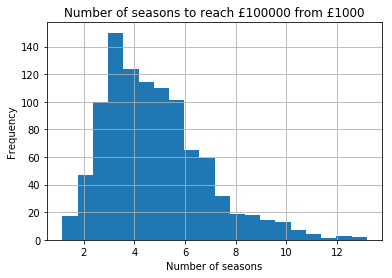

In [17]:
starting_money = 1000
target = 100000
drawing_chance = 0.422
both_predict_draw_chance = 0.089
length_of_season = 38
matches_in_round = 10
winning_odds_mean = 3.38
winning_odds_sdev = 0.14
percent_of_money_to_spend = 0.1

def sim_until_target():
    
    number_of_seasons = []
    
    for sim in range(0, 1000):
        
        money = starting_money
        match_week = 0
        
        while money < target: 
#             if money <= starting_money * 0.05:
#                 print("*"*20)
#                 print("You have lost")
#                 print("*"*20)
#                 return

            matches_this_week = np.random.binomial(matches_in_round, both_predict_draw_chance)
            
            if matches_this_week > 0:
                money_to_spend = round(money * percent_of_money_to_spend * matches_this_week, 2)
                money -= money_to_spend
                
                for match in range(matches_this_week):
                    draw_winnings_ratio = np.random.normal(winning_odds_mean, winning_odds_sdev)
                    money += round((np.random.binomial(1, drawing_chance) 
                                    * draw_winnings_ratio * money_to_spend / matches_this_week), 2)
            else:
                pass

            match_week += 1
        number_of_seasons.append(match_week / length_of_season)
    return number_of_seasons

number_of_seasons = sim_until_target()

pd.Series(number_of_seasons).hist(bins=20)
plt.title("Number of seasons to reach £{} from £{}".format(target, starting_money))
plt.xlabel("Number of seasons")
plt.ylabel("Frequency")
plt.show()

In [18]:
pd.Series(number_of_seasons).describe()

count    1000.000000
mean        4.810711
std         1.992014
min         1.157895
25%         3.342105
50%         4.526316
75%         5.848684
max        13.184211
dtype: float64

In [19]:
pd.Series(number_of_seasons).quantile(0.1)

2.6052631578947363

In [20]:
pd.Series(number_of_seasons).quantile(0.9)

7.342105263157895

Can expect to get to £100,000 in between 2.5 and 7 seasons

# Lawro Only

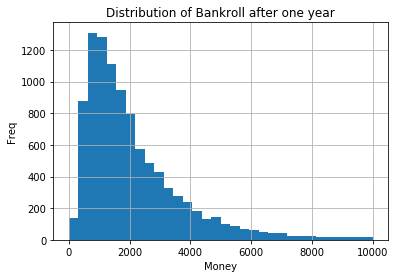

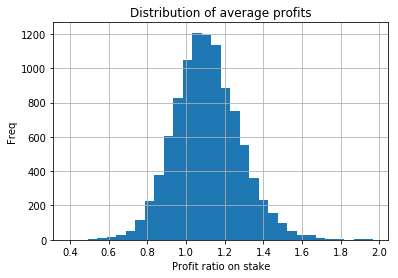

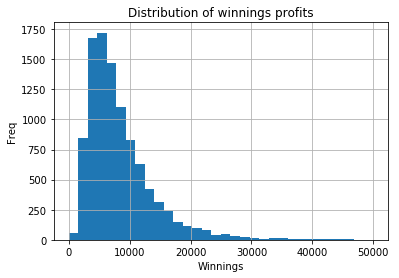

In [13]:
starting_money = 1000
drawing_chance = 0.35
both_predict_draw_chance = 0.25
length_of_season = 38
matches_in_round = 10
winning_odds_mean = 3.45
winning_odds_sdev = 0.15
percent_of_money_to_spend = 0.05
season_end_money = []
percentages = []
winnings = []

def sim_one_season():
    
    for sim in range(0, 10000):
        money = starting_money
        match_week = 0
        overall_stake_in_season = 0
        overall_winnings_in_season = 0
        
        while match_week < length_of_season:
            if money <= starting_money * 0.05:
                print("*"*20)
                print("You have lost")
                print("*"*20)
                return

            matches_this_week = np.random.binomial(matches_in_round, both_predict_draw_chance)

            if matches_this_week > 0:
                money_staked = round(matches_this_week * money * percent_of_money_to_spend, 2)
                money -= money_staked
                overall_stake_in_season += money_staked

                for match in range(matches_this_week):
                    draw_winnings_ratio = np.random.normal(winning_odds_mean, winning_odds_sdev)
                    money_won = round((np.random.binomial(1, drawing_chance) * 
                                       draw_winnings_ratio * money_staked/matches_this_week), 2)
                    money += money_won
                    overall_winnings_in_season += money_won

            else:
                pass
            match_week += 1
            
        season_end_money.append(money)
        percentages.append(overall_winnings_in_season/overall_stake_in_season)
        winnings.append(overall_winnings_in_season)

sim_one_season()

pd.Series(season_end_money).hist(bins=32, range=(0,10000))
plt.title("Distribution of Bankroll after one year")
plt.xlabel("Money")
plt.ylabel("Freq")

plt.show()

pd.Series(percentages).hist(bins=32)
plt.title("Distribution of average profits")
plt.xlabel("Profit ratio on stake")
plt.ylabel("Freq")

plt.show()

pd.Series(winnings).hist(bins=32, range=(0,50000))
plt.title("Distribution of winnings profits")
plt.xlabel("Winnings")
plt.ylabel("Freq")

plt.show()

# pd.Series(number_of_seasons).mean()


In [14]:
pd.Series(season_end_money).describe()

count    10000.000000
mean      2240.533860
std       2088.766003
min         70.580000
25%        976.895000
50%       1646.065000
75%       2791.497500
max      37048.460000
dtype: float64

In [18]:
pd.Series(season_end_money).quantile(0.26)

1001.954

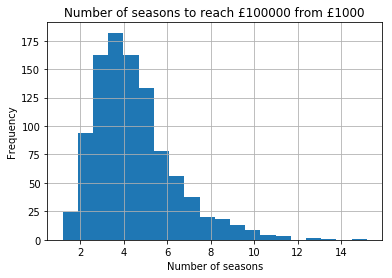

In [185]:
starting_money = 1000
target = 100000
drawing_chance = 0.42
both_predict_draw_chance = 0.09
length_of_season = 38
matches_in_round = 10
winning_odds_mean = 3.45
winning_odds_sdev = 0.15
percent_of_money_to_spend = 0.1

def sim_until_target():
    
    number_of_seasons = []
    
    for sim in range(0, 1000):
        
        money = starting_money
        match_week = 0
        
        while money < target: 
            if money <= starting_money * 0.05:
                print("*"*20)
                print("You have lost")
                print("*"*20)
                return

            matches_this_week = np.random.binomial(matches_in_round, both_predict_draw_chance)
            
            if matches_this_week > 0:
                money_to_spend = round(money * percent_of_money_to_spend * matches_this_week, 2)
                money -= money_to_spend
                
                for match in range(matches_this_week):
                    draw_winnings_ratio = np.random.normal(winning_odds_mean, winning_odds_sdev)
                    money += round((np.random.binomial(1, drawing_chance) 
                                    * draw_winnings_ratio * money_to_spend / matches_this_week), 2)
            else:
                pass

            match_week += 1
        number_of_seasons.append(match_week / length_of_season)
    return number_of_seasons

number_of_seasons = sim_until_target()

pd.Series(number_of_seasons).hist(bins=20)
plt.title("Number of seasons to reach £{} from £{}".format(target, starting_money))
plt.xlabel("Number of seasons")
plt.ylabel("Frequency")
plt.show()

# Bayesian

with bayesian estimate of their probability of predicting a draw, based on 134 games which they both predicted as a drawm and 56 succeses

In [23]:
from scipy import special

class Beta:
    """Represents a Beta distribution.

    See http://en.wikipedia.org/wiki/Beta_distribution
    """
    def __init__(self, alpha=1, beta=1, label=None):
        """Initializes a Beta distribution."""
        self.alpha = alpha
        self.beta = beta
        self.label = label if label is not None else '_nolegend_'

    def Update(self, data):
        """Updates a Beta distribution.

        data: pair of int (heads, tails)
        """
        heads, tails = data
        self.alpha += heads
        self.beta += tails

    def Mean(self):
        """Computes the mean of this distribution."""
        return self.alpha / (self.alpha + self.beta)

    def MAP(self):
        """Computes the value with maximum a posteori probability."""
        a = self.alpha - 1
        b = self.beta - 1
        return a / (a + b)

    def Random(self):
        """Generates a random variate from this distribution."""
        return random.betavariate(self.alpha, self.beta)

    def Sample(self, n):
        """Generates a random sample from this distribution.

        n: int sample size
        """
        size = n,
        return np.random.beta(self.alpha, self.beta, size)

    def EvalPdf(self, x):
        """Evaluates the PDF at x."""
        return x ** (self.alpha - 1) * (1 - x) ** (self.beta - 1)

    def MakePmf(self, steps=101, label=None):
        """Returns a Pmf of this distribution.

        Note: Normally, we just evaluate the PDF at a sequence
        of points and treat the probability density as a probability
        mass.

        But if alpha or beta is less than one, we have to be
        more careful because the PDF goes to infinity at x=0
        and x=1.  In that case we evaluate the CDF and compute
        differences.

        The result is a little funny, because the values at 0 and 1
        are not symmetric.  Nevertheless, it is a reasonable discrete
        model of the continuous distribution, and behaves well as
        the number of values increases.
        """
        if label is None and self.label is not None:
            label = self.label

        if self.alpha < 1 or self.beta < 1:
            cdf = self.MakeCdf()
            pmf = cdf.MakePmf()
            return pmf

        xs = [i / (steps - 1) for i in range(steps)]
        probs = [self.EvalPdf(x) for x in xs]
        pmf = Pmf(dict(zip(xs, probs)), label=label)
        return pmf

    def MakeCdf(self, steps=101):
        """Returns the CDF of this distribution."""
        xs = [i / (steps - 1) for i in range(steps)]
        ps = special.betainc(self.alpha, self.beta, xs)
        cdf = Cdf(xs, ps)
        return cdf

    def Percentile(self, ps):
        """Returns the given percentiles from this distribution.

        ps: scalar, array, or list of [0-100]
        """
        ps = np.asarray(ps) / 100
        xs = special.betaincinv(self.alpha, self.beta, ps)
        return xs


Assumptions made in this model:  
1. 90th percentile confidence interval for both of them is at worst as good as random guessing (25% of games are draws)
3. and at best as good as their performance over the past three seasons (44%) - quite conservative??
2. centred on their average as an individual - 34% for each

In [48]:
cons = Beta(21, 45, label='Consensus Model')


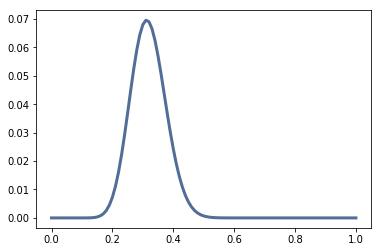

In [49]:
thinkplot.Pdf(cons.MakePmf())

In [50]:
cons.Mean()

0.3181818181818182

In [51]:
cons.MakeCdf().CredibleInterval(90)

(0.23000000000000001, 0.41999999999999998)

In [52]:
cons.Update((56, 78))

In [53]:
cons_sample = cons.MakeCdf(10001).Sample(10000)

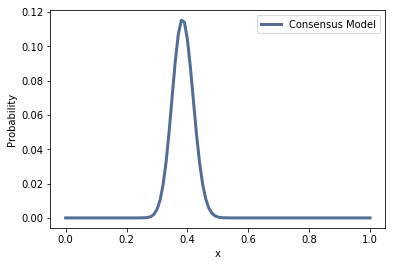

In [54]:

thinkplot.Pdf(cons.MakePmf())
thinkplot.Config(xlabel='x', ylabel='Probability')

In [55]:
cons.Mean()

0.385

In [56]:
cons.MakeCdf().CredibleInterval(90)

(0.33000000000000002, 0.45000000000000001)

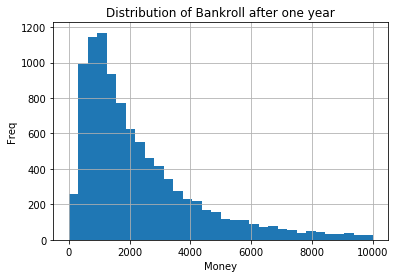

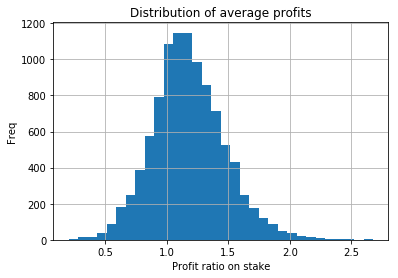

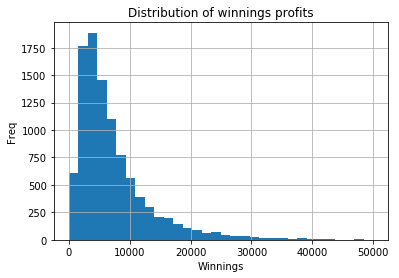

In [57]:
starting_money = 1000
# drawing_chance = 0.42
both_predict_draw_chance = 0.089
length_of_season = 38
matches_in_round = 10
winning_odds_mean = 3.38
winning_odds_sdev = 0.14
percent_of_money_to_spend = 0.1
season_end_money = []
percentages = []
winnings = []

def sim_one_season():
    
    for sim in range(0, 10000):
        money = starting_money
        match_week = 0
        overall_stake_in_season = 0
        overall_winnings_in_season = 0
        
        while match_week < length_of_season:
            if money <= starting_money * 0.05:
                print("*"*20)
                print("You have lost")
                print("*"*20)
                return

            matches_this_week = np.random.binomial(matches_in_round, both_predict_draw_chance)

            if matches_this_week > 0:
                money_staked = round(matches_this_week * money * percent_of_money_to_spend, 2)
                money -= money_staked
                overall_stake_in_season += money_staked

                for match in range(matches_this_week):
                    draw_winnings_ratio = np.random.normal(winning_odds_mean, winning_odds_sdev)
                    money_won = round((np.random.binomial(1, cons_sample.take([np.random.randint(0, cons_sample.size)])[0]) * 
                                       draw_winnings_ratio * money_staked/matches_this_week), 2)
                    money += money_won
                    overall_winnings_in_season += money_won

            else:
                pass
            match_week += 1
            
        season_end_money.append(money)
        percentages.append(overall_winnings_in_season/overall_stake_in_season)
        winnings.append(overall_winnings_in_season)

sim_one_season()

pd.Series(season_end_money).hist(bins=32, range=(0,10000))
plt.title("Distribution of Bankroll after one year")
plt.xlabel("Money")
plt.ylabel("Freq")

plt.show()

pd.Series(percentages).hist(bins=32)
plt.title("Distribution of average profits")
plt.xlabel("Profit ratio on stake")
plt.ylabel("Freq")

plt.show()

pd.Series(winnings).hist(bins=32, range=(0,50000))
plt.title("Distribution of winnings profits")
plt.xlabel("Winnings")
plt.ylabel("Freq")

plt.show()

# pd.Series(number_of_seasons).mean()


In [58]:
pd.Series(season_end_money).describe()

count     10000.000000
mean       2715.866437
std        3347.019836
min          63.660000
25%         965.072500
50%        1748.805000
75%        3288.752500
max      129841.560000
dtype: float64

In [59]:
pd.Series(season_end_money).quantile(0.1)

551.6390000000001

In [60]:
pd.Series(season_end_money).quantile(0.9)

5759.096

In [61]:
sorted_season_end_money = [round(x, 0) for x in sorted(season_end_money)]

In [62]:
round(sorted_season_end_money.index(1000)/len(sorted_season_end_money) * 100, 0)

26.0

22nd percentile break even

Median is £2000, and down to the 22nd percentile before we start making a loss. Almost double bankroll money after 34 bets. Not bad.

triangle and uniform priors give same result

however, assuming that the 90th percentile confidence interval for both of them is at worst as good as random guessing and at best as good as their performance over the past three seasons, and centred on their average as an individual then we get a slightly different posterior, and our expected winnings are down over a season, as is the percentile at which we make a loss. However, still, on average, up.

In [104]:
cons = Beta(24, 47, label='Assumption Start')


In [105]:
cons.Update((56, 78))

In [106]:
uniform = Beta(1,1, label="Uniform start")

In [107]:
uniform.Update((56,78))

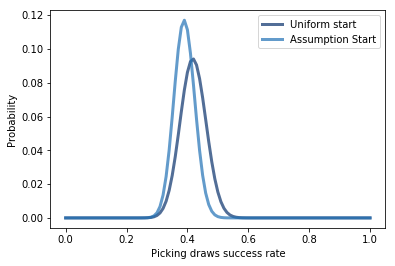

In [111]:
thinkplot.Pdfs([uniform.MakePmf(), cons.MakePmf()])
thinkplot.Config(xlabel='Picking draws success rate', ylabel='Probability')

In [112]:
uniform.Mean()

0.41911764705882354

In [113]:
cons.Mean()

0.3902439024390244